In [34]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
df1= pd.read_csv("placement.csv")
df1.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [6]:
x1=df1.iloc[:,:-1]
y1=df1["placed"]

In [12]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [13]:
lr1=LogisticRegression()
lr1.fit(x1_train,y1_train)

LogisticRegression()

In [14]:
lr1.score(x1_test,y1_test)*100

100.0

In [10]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [19]:
cf1=confusion_matrix(y1_test,lr1.predict(x1_test))

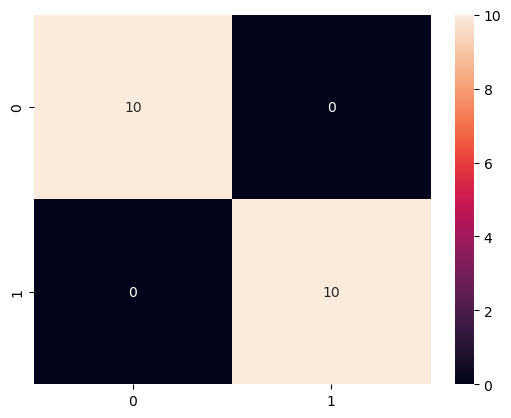

In [20]:
sns.heatmap(cf1,annot=True)
plt.show()

In [21]:
precision_score(y1_test,lr1.predict(x1_test))*100

100.0

In [22]:
recall_score(y1_test,lr1.predict(x1_test))*100

100.0

In [23]:
f1_score(y1_test,lr1.predict(x1_test))*100

100.0

# RAndom under sampling

In [25]:
df= pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [27]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [28]:
x=df.iloc[:,:-1]
y=df["Purchased"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 

In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
lr.score(x_test,y_test)*100

88.75

In [33]:
lr.predict([[30,107000]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [50]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [57]:
ru=RandomUnderSampler()
ru_x,ru_y=ru.fit_resample(x,y) # showing 2 columns

In [58]:
ru_x,ru_y

(     Age  EstimatedSalary
 119   41            59000
 305   42            54000
 77    22            27000
 256   41            72000
 306   51           134000
 ..   ...              ...
 393   60            42000
 395   46            41000
 396   51            23000
 397   50            20000
 399   49            36000
 
 [286 rows x 2 columns],
 119    0
 305    0
 77     0
 256    0
 306    0
       ..
 393    1
 395    1
 396    1
 397    1
 399    1
 Name: Purchased, Length: 286, dtype: int64)

In [59]:
ru_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [60]:
x2_train,x2_test,y2_train,y2_test=train_test_split(ru_x,ru_y,test_size=0.2,random_state=42)

In [61]:
lr2=LogisticRegression()
lr2.fit(x2_train,y2_train)

LogisticRegression()

In [62]:
lr2.score(x2_test,y2_test)*100

79.3103448275862

# RAndom over sampling

In [63]:
ro=RandomOverSampler()
ro_x,ro_y=ro.fit_resample(x,y) # showing 2 columns

In [68]:
ro_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [70]:
x3_train,x3_test,y3_train,y3_test=train_test_split(ro_x,ro_y,test_size=0.2,random_state=42)

In [71]:
lr3=LogisticRegression()
lr3.fit(x3_train,y3_train)

LogisticRegression()

In [72]:
lr3.score(x3_test,y3_test)*100

84.46601941747572